In [25]:
import pandas as pd
import numpy as np

In [26]:
data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Math_Score': [88, 92, 95, np.nan, 45, 82, 99, 100, 20, 85],
    'Reading_Score': [78, 85, 88, 70, 90, 75, 77, 95, 60, 82],
    'Hours_Studied': [10, 12, 15, 0, 1, 9, 20, 30, 0.5, 10]
}
df = pd.DataFrame(data)
df

,Student_ID,Math_Score,Reading_Score,Hours_Studied
0,1,88.0,78,10.0
1,2,92.0,85,12.0
2,3,95.0,88,15.0
3,4,NaN,70,0.0
4,5,45.0,90,1.0
5,6,82.0,75,9.0
6,7,99.0,77,20.0
7,8,100.0,95,30.0
8,9,20.0,60,0.5
9,10,85.0,82,10.0


In [27]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Student_ID       0
Math_Score       1
Reading_Score    0
Hours_Studied    0
dtype: int64


In [ ]:
df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)

C:\Users\ASHISH BAGHMAR\AppData\Local\Temp\ipykernel_6216\958010127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)


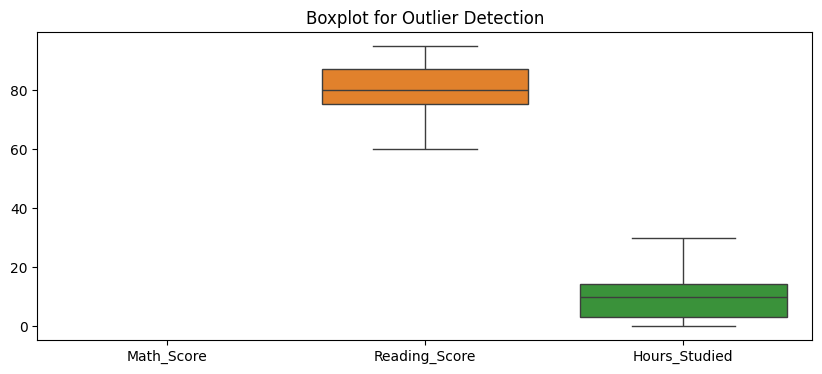

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Math_Score', 'Reading_Score', 'Hours_Studied']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [30]:
def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(col < lower, lower, np.where(col > upper, upper, col))
df['Hours_Studied'] = cap_outliers(df['Hours_Studied'])

In [31]:
df['Log_Hours_Studied'] = np.log1p(df['Hours_Studied'])
print("Original skew:", df['Hours_Studied'].skew())
print("Transformed skew:", df['Log_Hours_Studied'].skew())
print(df)

Original skew: 0.7939195909701177
Transformed skew: -0.7811569245251885
   Student_ID Math_Score  Reading_Score  Hours_Studied  Log_Hours_Studied
0           1       None             78           10.0           2.397895
1           2       None             85           12.0           2.564949
2           3       None             88           15.0           2.772589
3           4       None             70            0.0           0.000000
4           5       None             90            1.0           0.693147
5           6       None             75            9.0           2.302585
6           7       None             77           20.0           3.044522
7           8       None             95           30.0           3.433987
8           9       None             60            0.5           0.405465
9          10       None             82           10.0           2.397895
